# Рынок заведений общественного питания Москвы

В данном проекте мы исследуем рынок заведений общественного питания Москвы.
Цель проекта - выбрать наиболее подходящий формат заведения и место расположения для нового заведения, в котором посетителей обслуживают роботы.  

Исследование будем проводить на основании открытых данных о заведениях общественного питания в Москве.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import seaborn as sns

## Предобработка данных

In [2]:
#В проекте использован датасет предоставленный Яндекс.Практикум
df = pd.read_csv('/***/***.csv')

In [3]:
df.head(20)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Названия некоторых заведений приведены прописными буквами. Приведем все названия к написанию строчными буквами, чтобы исключить случаи, когда заведения одной сети записаны по-разному

In [5]:
df['object_name']=df['object_name'].str.lower()

В колонке chain заменим данные на булев тип

In [6]:
df['chain'] = df['chain'].replace({'да':1,'нет':0})

In [7]:
df['chain'] = df['chain'].astype('bool')

In [8]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [9]:
df.duplicated().sum()

0

In [10]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Заменим некоторые названия на более короткие

In [11]:
df['object_type'] = df['object_type'].replace({'предприятие быстрого обслуживания': 'фастфуд', 'магазин (отдел кулинарии)': 'отдел кулинарии'})

В названиях заведений встречаются те, что приведены в написании кирилицей и латиницей.  Также некоторые названия включают вид заведения.

Уберем из названий кавычки, а также упоминание вида заведения "ресторан", "кафе", "пиццерия"

In [12]:
len(df)

15366

In [13]:
df['object_name']=df['object_name'].replace(regex=["ресторан ", "кафе ", "пиццерия ", 'кофейня ', '«', '»'], value='')

In [14]:
df['object_name']=df['object_name'].replace({'сабвей': 'subway', 'старбакс': 'starbucks', 'pizza express': 'пицца экспресс', 'baskin robbins': 'баскин роббинс', 'pizza hut': 'пицца хат', 'кофикс': 'cofix', 'dominos pizza': "домино'с пицца", 'mcdonalds': 'макдоналдс', 'бургер кинг': 'burger king', 'il patio': 'иль патио', 'prime star': 'прайм стар', 'коста кофе': 'costa coffee'})

In [15]:
len(df)

15366

In [16]:
df.head(20)

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,False,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,буфет мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Пропусков нет, полных дубликатов в данных тоже нет

В данных есть строки, в которых совпадает всё кроме id. Вероятная причина их появления - данные собраны из разных источников.Удалим такие дубликаты. 

In [17]:
df.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

In [18]:
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

85

In [19]:
len(df)

15366

In [20]:
df = df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

In [21]:
len(df)

15281

In [22]:
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

0

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

In [23]:
types = df.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()

In [24]:
types

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,фастфуд,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,отдел кулинарии,273


Посчитаем долю каждого вида

In [27]:
types['share'] = types['id']/(types['id'].sum())

In [28]:
types

,object_type,id,share
0,кафе,6071,0.397291
1,столовая,2584,0.169099
2,ресторан,2282,0.149336
3,фастфуд,1897,0.124141
4,бар,855,0.055952
5,буфет,576,0.037694
6,кафетерий,395,0.025849
7,закусочная,348,0.022773
8,отдел кулинарии,273,0.017865


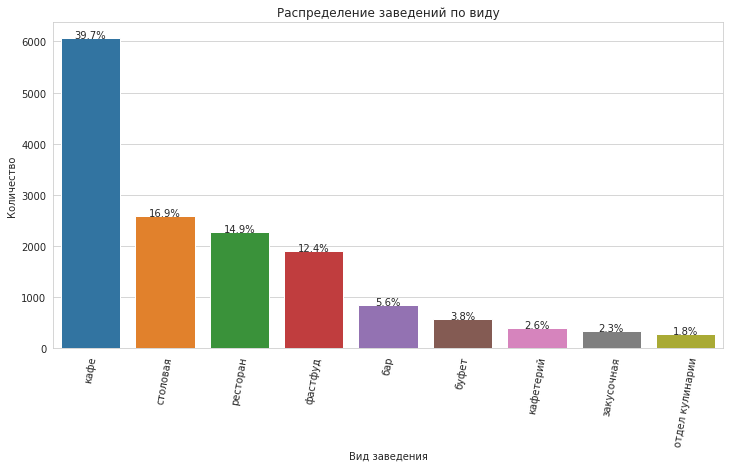

In [30]:
sns.set_style("whitegrid") 

plt.figure(figsize=(12,6))
graph = sns.barplot(data = types, x = 'object_type', y = 'id')

percentage = types['share']

patches = graph.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.07
   graph.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center')
plt.xticks(rotation=80)
plt.title("Распределение заведений по виду")
plt.xlabel('Вид заведения')
plt.ylabel('Количество')
plt.show()

Из всех видов заведений больше всего в Москве кафе: 6099 заведений, или почти 40% от общего количества.  
Далее следуют столовая -	2587	(16.84%),	ресторан -	2285	(14.87%), предприятие быстрого обслуживания -	1923 (12,51%).  
На остальные виды приходится менее чем по 1000 заведений. 

### Соотношение сетевых и несетевых заведений по количеству

In [31]:
total_cnt = len(df)

In [32]:
total_cnt

15281

In [33]:
chain_cnt = df['chain'].sum()

In [34]:
chain_cnt

2964

In [35]:
single_cnt = total_cnt - chain_cnt

In [36]:
single_cnt

12317

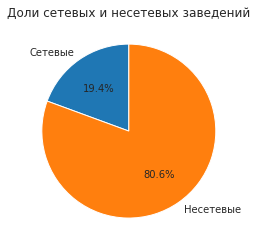

In [37]:
labels = 'Сетевые', 'Несетевые'
chain = [chain_cnt, single_cnt]

fig1, ax1 = plt.subplots()
ax1.pie(chain, labels=labels, autopct='%1.1f%%',shadow=False,
         startangle=90)
plt.title("Доли сетевых и несетевых заведений")
plt.show()

В Москве 2968 сетевых заведений (19,3%) и 12398 несетевых (80,7%).

### Исследуем для какого вида объекта общественного питания характерно сетевое распространение

Найдем долю сетевых заведений для каждого вида.

In [38]:
chain_type = df.groupby('object_type')['chain'].mean().sort_values(ascending=False).reset_index()


In [39]:
chain_type['chain'] = chain_type['chain'].round(3)

In [40]:
chain_type

,object_type,chain
0,фастфуд,0.415
1,отдел кулинарии,0.286
2,ресторан,0.238
3,кафе,0.230
4,закусочная,0.161
5,кафетерий,0.132
6,бар,0.043
7,буфет,0.019
8,столовая,0.001


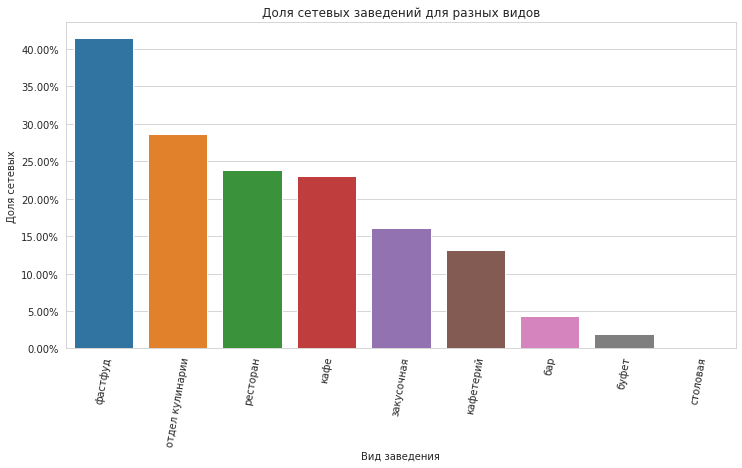

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

graph = sns.barplot(data = chain_type, x='object_type', y='chain')
type(graph)
vals = graph.get_yticks()
graph.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.xticks(rotation=80)
plt.title("Доля сетевых заведений для разных видов")
plt.xlabel('Вид заведения')
plt.ylabel('Доля сетевых')
plt.show()

Больше всего сетевых заведений среди предприятий быстрого обслуживания, 41% от их общего числа.  
За ними следуют отделы кулинарии с 28%. У ресторанов и кафе приблизительно по 23%.


### Сетевые заведения

Посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [42]:
chain_seats = df[df['chain']==True].groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index()

In [43]:
chain_seats.sort_values(by='id',ascending=False).head(20)

,object_name,id,number
440,шоколадница,183,57.814208
26,kfc,170,55.070588
247,макдоналдс,164,89.036585
7,burger king,144,46.923611
395,теремок,105,26.638095
163,домино'с пицца,97,18.113402
228,крошка картошка,92,21.782609
379,суши wok,74,6.837838
257,милти,72,1.333333
286,папа джонс,65,22.307692


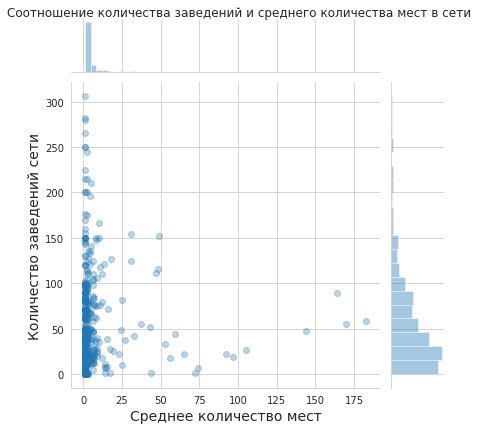

In [101]:
sns.set_style("whitegrid")
ax=sns.jointplot(x='id', y='number', data=chain_seats, alpha=0.3);
ax.set_axis_labels('Среднее количество мест', 'Количество заведений сети', fontsize=14)
ax.fig.suptitle("Соотношение количества заведений и среднего количества мест в сети")
ax.fig.subplots_adjust(top=0.95)
plt.show()

Более распространены сети с большим количеством заведений, но при этом с малым количеством мест в каждом заведении.

### Среднее количество посадочных мест по видам заведений


Изучим, какой вид предоставляет в среднем самое большое количество посадочных мест

In [45]:
avg_seats = df.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()

In [46]:
avg_seats

,object_type,number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703
5,фастфуд,20.808645
6,кафетерий,9.184810
7,закусочная,7.847701
8,отдел кулинарии,5.589744


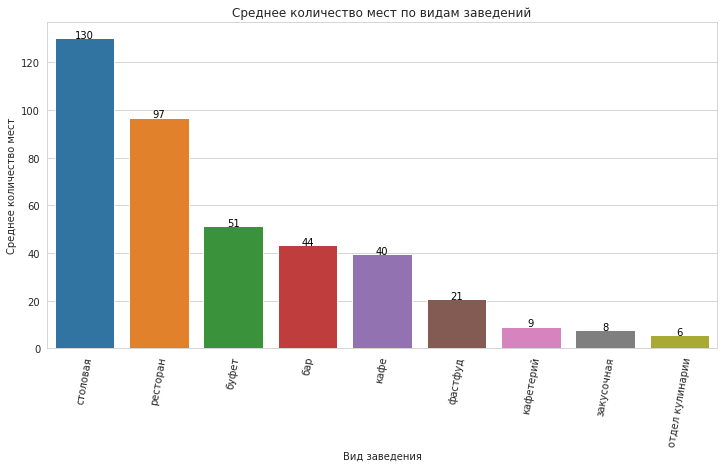

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="object_type", y="number", data=avg_seats)
plt.title("Среднее количество мест по видам заведений")
plt.xlabel('Вид заведения')
plt.ylabel('Среднее количество мест')
plt.xticks(rotation=80)
for index, row in avg_seats.iterrows():
    ax.text(row.name,row.number, round(row.number), color='black', ha="center")
plt.show()


В среднем больше всего мест в столовых (130), за ними следуют рестораны с 97 местами. В буфетах в среднем по 51 месту.  
Бары и кафе обычно рассчитаны на 40 посетителей.

### Выделяем информацию об улице

Выделим в отдельный столбец информацию об улице из столбца address .

In [48]:
df['address'].head(10)

0           город Москва, улица Егора Абакумова, дом 9
1    город Москва, улица Талалихина, дом 2/1, корпус 1
2            город Москва, Абельмановская улица, дом 6
3              город Москва, Абрамцевская улица, дом 1
4    город Москва, Абрамцевская улица, дом 9, корпус 1
5    город Москва, Абрамцевская улица, дом 15, корп...
6        город Москва, переулок Сивцев Вражек, дом 6/2
7    город Москва, Авиамоторная улица, дом 8, строе...
8    город Москва, Авиамоторная улица, дом 8, строе...
9    город Москва, Авиамоторная улица, дом 8, строе...
Name: address, dtype: object

In [49]:
def split_address(x):
    return x.split(', дом')[0]

In [50]:
df['street'] = df['address'].apply(lambda x : split_address(x))

In [51]:
df['street'] = df['street'].replace(regex=["город Москва, "], value='')

In [52]:
df['street'].head(10)

0     улица Егора Абакумова
1          улица Талалихина
2      Абельмановская улица
3        Абрамцевская улица
4        Абрамцевская улица
5        Абрамцевская улица
6    переулок Сивцев Вражек
7        Авиамоторная улица
8        Авиамоторная улица
9        Авиамоторная улица
Name: street, dtype: object

В колонке street получили улицы Москвы. Для населенных пунктов, включенных в Москву (Зеленоград и пр.), также указано название населенного пункта - таким образом при наличии улиц с одинаковыми названиями, мы сможем их различить. 



In [53]:
df_failed_address = df.query('(street.str.contains(","))', engine='python')
df_failed_address.head(50)

,id,object_name,chain,object_type,address,number,street
145,24606,радэа,False,кафе,"город Москва, Нахимовский проспект, владение 75А",7,"Нахимовский проспект, владение 75А"
741,151319,галерея,False,кафе,"город Москва, Нагорная улица, владение 25, стр...",150,"Нагорная улица, владение 25, строение 1"
856,25558,му-му,True,кафе,"город Москва, 9-я Парковая улица, владение 61А...",200,"9-я Парковая улица, владение 61А, строение 1"
1386,22331,столовая миэт,False,столовая,"город Москва, город Зеленоград, улица Юности, ...",56,"город Зеленоград, улица Юности"
1405,20199,это,False,кафе,"город Москва, город Зеленоград, корпус 401",35,"город Зеленоград, корпус 401"
1406,68113,френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34,"город Зеленоград, корпус 435"
1407,20105,граф монте-кристо,False,кафе,"город Москва, город Зеленоград, корпус 436",40,"город Зеленоград, корпус 436"
1408,22982,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49,"город Зеленоград, корпус 438"
1409,151267,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",45,"город Зеленоград, корпус 438"
1410,150537,вечный зов,False,кафе,"город Москва, город Зеленоград, корпус 834А",30,"город Зеленоград, корпус 834А"


In [54]:
len(df_failed_address)/len(df)

0.07309731038544598

Четко выделить улицу не удалось примерно в 7,5% записей.  
Большинство из этих адресов расположены в городах и поселениях за пределами непосредственно Москвы (Зеленоград и пр.).
Некоторые адреса не подпадают под общий шаблон, например "улица Мичуринский Проспект, Олимпийская Деревня", в некоторых записях улица не указана (напр. "поселение Краснопахорское, село Красная Пахра").

In [58]:
top_streets = df.groupby('street')['id'].count().sort_values(ascending = False).reset_index().head(10)

In [59]:
top_streets

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,155
5,Ленинский проспект,147
6,проспект Вернадского,127
7,Кутузовский проспект,114
8,Каширское шоссе,103
9,Ходынский бульвар,102


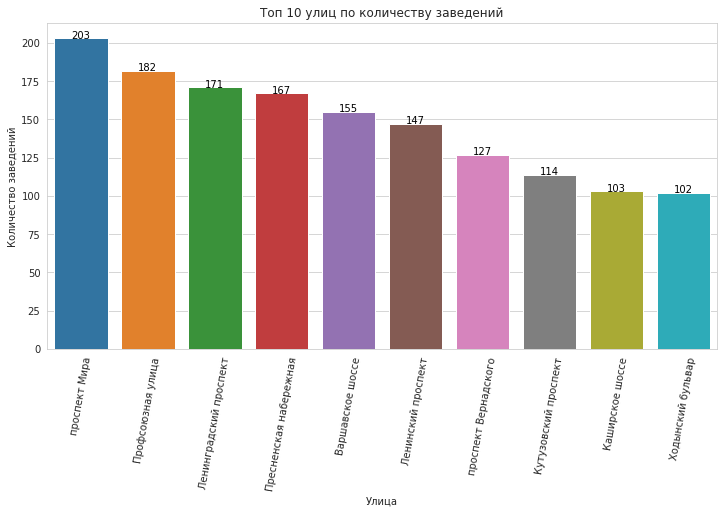

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="street", y="id", data=top_streets)
plt.title("Топ 10 улиц по количеству заведений")
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.xticks(rotation=80)
for index, row in top_streets.iterrows():
    ax.text(row.name,row.id, row.id, color='black', ha="center")
plt.show()

Импортируем данные о районах (источник - данные Мосгаз), чтобы узнать, в каких районах находятся улицы.

https://docs.google.com/spreadsheets/d/1LhhYh5DfmddEDYDERolchChiS1T9Lgdw7OhVG7q3cKA/edit?usp=sharing


In [61]:
from io import BytesIO
import requests
spreadsheet_id = '1LhhYh5DfmddEDYDERolchChiS1T9Lgdw7OhVG7q3cKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.head(10)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район
6,Большая Грузинская улица,17,ЦАО,Пресненский район
7,Малая Грузинская улица,17,ЦАО,Пресненский район
8,Грузинская площадь,17,ЦАО,Пресненский район
9,улица Грузинский Вал,17,ЦАО,Пресненский район


Создадим таблицу, в которой для улиц также будет указан район Москвы. Улицы вне Москвы (Зеленоград и пр.) учитывать не будем.

In [62]:
df_area = df.merge(streets, how='left', left_on = 'street', right_on = 'streetname')

In [63]:
df_area.head()

,id,object_name,chain,object_type,address,number,street,streetname,areaid,okrug,area
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Абельмановская улица,18.0,ЦАО,Таганский район


In [64]:
df_area.groupby('street')['area'].nunique().sort_values(ascending=False).head(10)

street
Ленинский проспект          8
Варшавское шоссе            8
Волгоградский проспект      7
проспект Мира               7
Дмитровское шоссе           7
Ленинградское шоссе         6
Севастопольский проспект    6
Профсоюзная улица           6
Нахимовский проспект        6
шоссе Энтузиастов           5
Name: area, dtype: int64

In [65]:
df_area.groupby(['street', 'area']).agg({ 'id':'count'}).sort_values(by = 'id', ascending=False).reset_index().head(10)

,street,area,id
0,проспект Мира,Ярославский Район,203
1,проспект Мира,Район Свиблово,203
2,проспект Мира,Район Ростокино,203
3,проспект Мира,Район Марьина роща,203
4,проспект Мира,Останкинский район,203
5,проспект Мира,Алексеевский район,203
6,проспект Мира,Мещанский район,203
7,Профсоюзная улица,Обручевский район,182
8,Профсоюзная улица,Район Ясенево,182
9,Профсоюзная улица,Район Коньково,182


Многие улицы из топ 10 по количеству заведений, проходят через несколько районов.

Получим список районов, через которые проходят топ 10 улиц

In [66]:
top_10_streets = top_streets['street']

In [67]:
df_area.query('street in @top_10_streets')['area'].unique()

array(['Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Район Дорогомилово',
       'Район Фили-Давыдково', 'Район Москворечье-Сабурово',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Аэропорт', 'Район Беговой', 'Хорошевский район',
       'Район Сокол', 'Обручевский район', 'Район Теплый Стан',
       'Район Якиманка', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район', 'Академический район',
       'Район Черемушки', 'Район Ясенево', 'Район Коньково',
       'Пресненский район'], dtype=object)

In [68]:
len(df_area.query('street in @top_10_streets')['area'].unique())

37

Улицы с наибольшим количеством заведений проходят через 37 районов Москвы

Для каждой улицы выведем список районов, через которые она проходит. 

In [69]:
pd.options.display.max_colwidth = -1

In [70]:
df_area\
    .query('street in @top_10_streets').groupby('street', as_index=False).agg({'area': set})

,street,area
0,Варшавское шоссе,"{Район Нагатино-Садовники, Донской район, Район Южное Бутово, Район Северное Бутово, Район Чертаново Центральное, Нагорный район, Район Чертаново Южное, Район Чертаново Северное}"
1,Каширское шоссе,"{Район Орехово-Борисово Северное, Район Орехово-Борисово Южное, Район Нагатино-Садовники, Район Москворечье-Сабурово}"
2,Кутузовский проспект,"{Район Дорогомилово, Район Фили-Давыдково}"
3,Ленинградский проспект,"{Район Сокол, Хорошевский район, Район Аэропорт, Район Беговой}"
4,Ленинский проспект,"{Район Теплый Стан, Донской район, Ломоносовский район, Район Проспект Вернадского, Район Тропарево-Никулино, Район Якиманка, Район Гагаринский, Обручевский район}"
5,Пресненская набережная,{Пресненский район}
6,Профсоюзная улица,"{Район Теплый Стан, Район Черемушки, Район Ясенево, Академический район, Обручевский район, Район Коньково}"
7,Ходынский бульвар,{Хорошевский район}
8,проспект Вернадского,"{Район Раменки, Ломоносовский район, Район Проспект Вернадского, Район Тропарево-Никулино, Район Гагаринский}"
9,проспект Мира,"{Район Ростокино, Район Марьина роща, Алексеевский район, Мещанский район, Район Свиблово, Ярославский Район, Останкинский район}"


Посмотрим в каких районах наибольшее количество улиц с заведениями.

In [71]:
top_areas = df_area.groupby('area')['street'].nunique().sort_values(ascending=False).reset_index().head(10)

In [72]:
top_areas

,area,street
0,Тверской район,106
1,Пресненский район,88
2,Таганский район,82
3,Басманный район,80
4,Район Хамовники,74
5,Даниловский район,49
6,Мещанский район,48
7,Район Замоскворечье,46
8,Район Арбат,45
9,Красносельский район,40


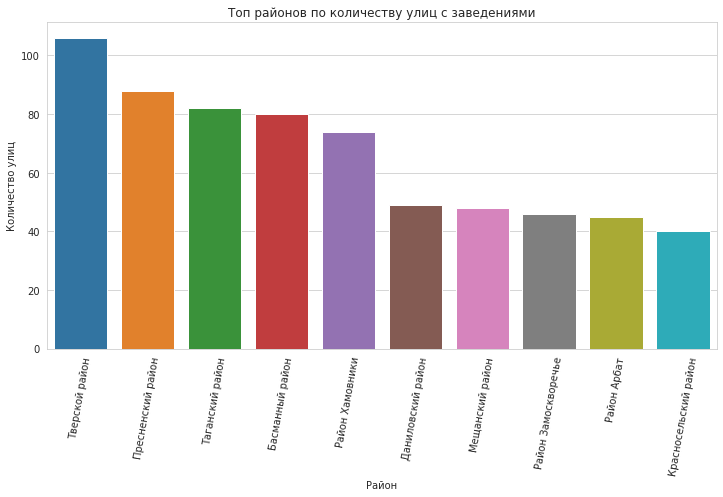

In [73]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="area", y="street", data=top_areas)
plt.title("Топ районов по количеству улиц с заведениями")
plt.xlabel('Район')
plt.ylabel('Количество улиц')
plt.xticks(rotation=80)

plt.show()

Можно выделить Пресненский район: в нем находится одна из наиболее популярных улиц (Пресненская набережная), а также в целом сосредоточено большое количество улиц с заведениями.

### Улицы с одним объектом общественного питания

Оставим в датафрейме только московские заведения

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 7 columns):
id             15281 non-null int64
object_name    15281 non-null object
chain          15281 non-null bool
object_type    15281 non-null object
address        15281 non-null object
number         15281 non-null int64
street         15281 non-null object
dtypes: bool(1), int64(2), object(4)
memory usage: 850.6+ KB


In [75]:
df_msk = df.query('~(address.str.contains("город Москва, город") or address.str.contains("город Москва, поселение"))', engine='python')

In [76]:
len(df_msk)

14469

Выберем улицы с одним заведением

In [77]:
 street_rest_num = df_msk.groupby('street')['id'].nunique().reset_index()

In [78]:
street_rest_num.head()

,street,id
0,1-й Автозаводский проезд,3
1,1-й Амбулаторный проезд,2
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1


In [79]:
lonely_cafe_streets = street_rest_num.query('id == 1')['street']

In [80]:
len(lonely_cafe_streets)

690

В Москве 689 улиц с одним заведением

Посмотрим в каких районах они находятся

In [81]:
df_msk_area = df_msk.merge(streets, how='left', left_on = 'street', right_on = 'streetname')

In [82]:
lonely_cafe_areas = df_msk_area.query('street in @lonely_cafe_streets').groupby('area')['id'].nunique().sort_values(ascending = False).reset_index()

In [83]:
len(lonely_cafe_areas)

101

Улицы с одним заведением встречаются в 101-м районе Москвы.

Посмотрим, в каких районах больше всего улиц с одним заведением.

In [84]:
lonely_cafe_areas.columns = ['area', 'qty']

In [85]:
lonely_cafe_areas.head(10)

,area,qty
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,20
5,Район Арбат,18
6,Район Марьина роща,17
7,Мещанский район,15
8,Район Сокольники,15
9,Район Замоскворечье,14


Таганский район, район Хамовники и Басманный район лидируют по количеству улиц с одним заведением.

###  Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Выберем заведения, находящиеся на топ 10 улиц по количеству заведений

In [86]:
crowded_street_rests = df_msk.query('street in @top_10_streets')

In [87]:
crowded_street_rests.head()

,id,object_name,chain,object_type,address,number,street
151,155973,андерсон,True,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,True,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,ламаджо,False,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,False,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,False,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


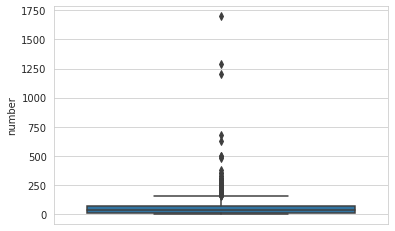

In [88]:
sns.set_style("whitegrid")
ax = sns.boxplot(y=crowded_street_rests["number"])

Уберем явные выбросы, оставим только заведения до 400 посадочных мест

In [89]:
crowded_street_rests = crowded_street_rests.query('number < 400')

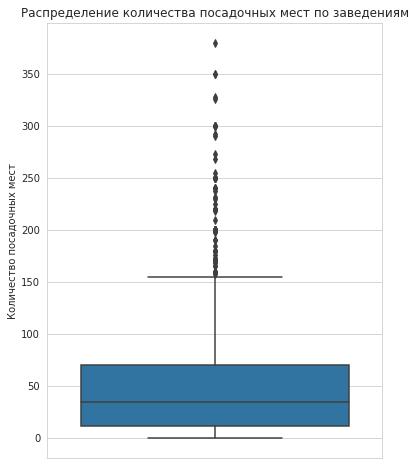

In [90]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ax = sns.boxplot(y=crowded_street_rests["number"])
plt.title("Распределение количества посадочных мест по заведениям")
plt.ylabel('Количество посадочных мест')
plt.show()

In [91]:
crowded_street_rests['number'].describe()

count    1463.00000
mean     51.37799  
std      57.52675  
min      0.00000   
25%      12.00000  
50%      35.00000  
75%      70.00000  
max      380.00000 
Name: number, dtype: float64

Медианное значение количества посадочных мест - 40.  
В целом наиболее распространенный формат - от 12 до 75 посадочных мест.


In [92]:
crowded_street_rests

,id,object_name,chain,object_type,address,number,street
151,155973,андерсон,True,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,True,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,ламаджо,False,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,False,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,False,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15325,198436,милти,True,фастфуд,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,Ленинградский проспект
15347,222491,кальянная мята lounge,True,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,Профсоюзная улица
15350,213061,мята,True,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе
15358,213724,шоколадница,True,кафе,"город Москва, Варшавское шоссе, дом 87Б",54,Варшавское шоссе


In [93]:
top_10_streets

0    проспект Мира         
1    Профсоюзная улица     
2    Ленинградский проспект
3    Пресненская набережная
4    Варшавское шоссе      
5    Ленинский проспект    
6    проспект Вернадского  
7    Кутузовский проспект  
8    Каширское шоссе       
9    Ходынский бульвар     
Name: street, dtype: object

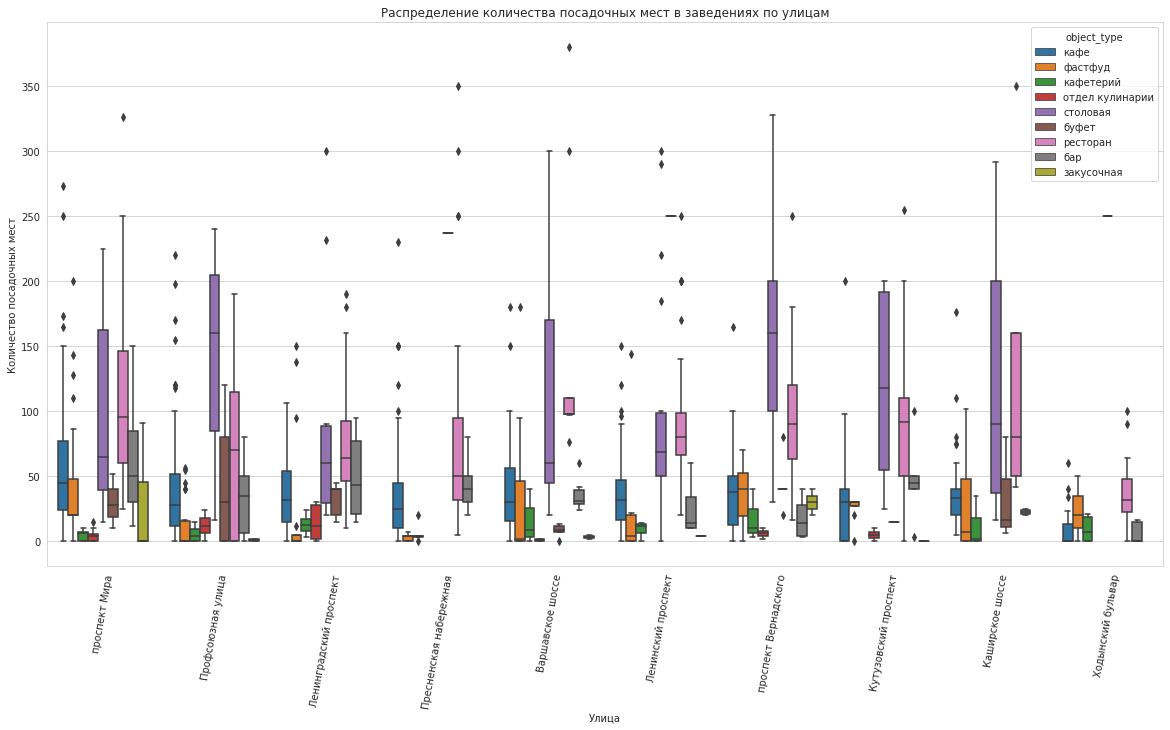

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = crowded_street_rests,  y="number", x = "street", hue = 'object_type', order = top_10_streets)
plt.xticks(rotation=80)
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.show()

Буфеты, закусочные, отделы кулинарии и кафетерии выглядят не очень перспективно: встречаются даже не на всех топовых улицах, а также количество мест в таких заведениях совсем небольшое.  
Посмотрим на распредение без этих видов заведений.

In [95]:
 limit_rests= ['закусочная', 'буфет', 'магазин (отдел кулинарии)', 'кафетерий']

In [96]:
crowded_street_rests_2 = crowded_street_rests.query('object_type not in @limit_rests')

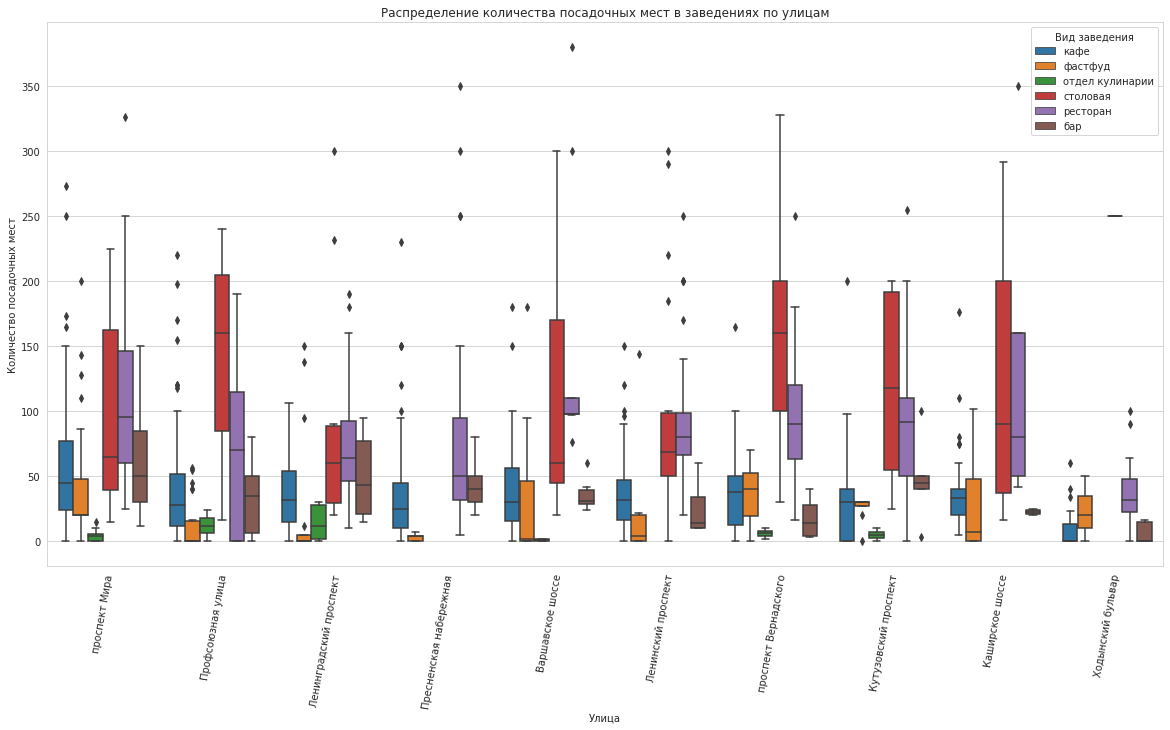

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = crowded_street_rests_2,  y="number", x = "street", hue = 'object_type', order = top_10_streets )
plt.xticks(rotation=80)
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.legend(title="Вид заведения")
plt.show()

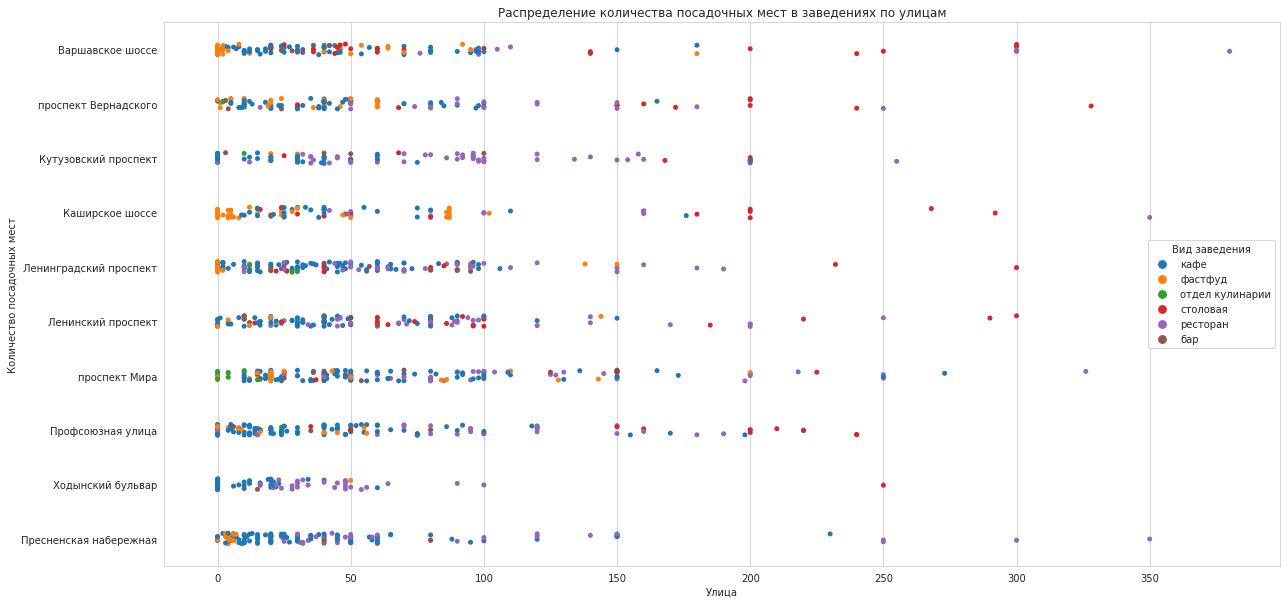

In [98]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
ax = sns.stripplot(data = crowded_street_rests_2,  y="street", x = "number", hue = 'object_type' )
plt.title("Распределение количества посадочных мест в заведениях по улицам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Улица')
plt.legend(title="Вид заведения")
plt.show()

По количеству посадочных мест доминирую столовые и рестораны. У этих двух видов заведений сопоставимое количество мест, разве что на Кировоградской столовые особенно вместительны.  В основном в них около 80 мест.  
В кафе и барах обычно 30-40 мест. В предприятиях быстрого обслуживания - около 10.  
Также можно отметить, что на Пресненской набережной заведения зачастую меньше, чем на крупных магистралях.


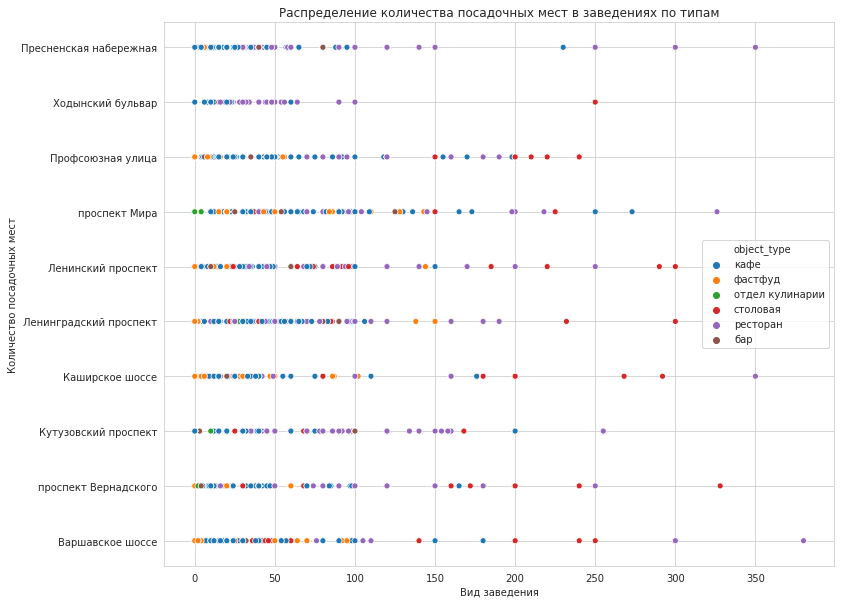

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
sns.scatterplot(data = crowded_street_rests_2, x = 'number', y = 'street', hue = 'object_type')
plt.title("Распределение количества посадочных мест в заведениях по типам")
plt.ylabel('Количество посадочных мест')
plt.xlabel('Вид заведения')
plt.show()

## Выводы
Кафе является самым востребованным видом заведения - кафе составляют почти 40% от всех заведений.  
В среднем больше всего посадочных мест в столовых (130), за ними следуют рестораны с 97 местами. В буфетах в среднем по 51 месту. В барах и ресторанах приблизительно по 40 мест.

В Москве преобладают несетевые заведения, таких 80%. Сетевые заведения чаще встречаются среди предприятий быстрого обслуживания (около 40%). Среди ресторанов и кафе около 23% являются сетевыми.

Топ 10 улиц по количеству заведений:

проспект Мира 204  
Профсоюзная улица 183  
Ленинградский проспект 172  
Пресненская набережная 167  
Варшавское шоссе 155  
Ленинский проспект 147  
проспект Вернадского 131  
Кутузовский проспект 114  
Каширское шоссе 103  
Кировоградская улица 102  
Улицы из топ-10 проходят 37 районов Москвы

Можно выделить Пресненский район:  в нем находится одна из наиболее популярных улиц (Пресненская набережная), а также в целом сосредоточено большое количество улиц с заведениями.
Другие районы с большим количеством улиц, на которых расположены заведения: Тверской район, Пресненский район, Таганский район, Басманный район.  

В Москве также есть 689 улиц с одним заведением. Такие улицы встречаются в 101-м районе Москвы. Таганский район, район Хамовники и Басманный район лидируют по количеству улиц с одним заведением.

На улицах с наибольшим количеством заведений по количеству посадочных мест доминирую столовые и рестораны. У этих двух видов заведений сопоставимое количество мест, разве что на Кировоградской столовые особенно вместительны. В основном в них около 80 мест. В кафе и барах обычно 30-40 мест. В предприятиях быстрого обслуживания - около 10.



## Презентация

Презентация: https://drive.google.com/file/d/1wvnVXTFtRj5cV_Kqv8EkDR5rDpZ0ZC2_/view?usp=sharing